<center><h1>Titanic</h1></center>

# 1. INTRODUÇÃO

O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tal perda de vida foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

![Titanic](https://upload.wikimedia.org/wikipedia/commons/d/d7/Sea_Trials_of_RMS_Titanic%2C_2nd_of_April_1912.jpg "Titanic")

### 1.1. A base de dados

 **Origem:** A base de dados foi adquirida através da plataforma de ensino da Udacity, porém, a mesma também pode ser encontrada no [site do Kaggle](https://www.kaggle.com/c/titanic/data)
 

| Coluna      | Descrição                                     | Valor                                |
|-------------|-----------------------------------------------|--------------------------------------|
| PassengerID | Identificador do passageiro                   |                                      |
| Survived    | Informa se o passageiro sobreviveu            | 0 = Não, 1 = Sim                     |
| Pclass      | Classe sócio-econômica                        | 1 Alta, 2 Média, 3 Baixa             |
| Name        | Nome do passageiro, com pronome de tratamento |                                      |
| Sex         | Gênero                                        |                                      |
| Age         | Idade                                         |                                      |
| SibSp       | Número de irmãos/cônjuges a bordo             |                                      |
| Parch       | Número de pais/filhos a bordo                 |                                      |
| Ticket      | Código do bilhete de passagem                 |                                      |
| Fare        | Preço da passagem                             |                                      |
| Cabin       | Cabine                                        |                                      |
| Embarked    | Local de embarque                             | Cherbourg, Queenstown ou Southampton |

### 1.2. Perguntas a serem respondidas

1. Qual foi o sexo predominante entre sobreviventes da tragédia?
2. Qual foi o sexo predominante em cada uma das classes sócio-econômicas?
3. Qual era a faixa etária dos passageiros presentes no Titanic?
4. Qual era a faixa etária predominante dos passageiros sobreviventes e falecidos?
5. Baseado na faixa etária, mais crianças ou adultos sobreviveram?
6. A classe sócio-econômica fora um fator determinante na taxa de sobrevivência?
7. Entre os passageiros e tripulantes falecidos, qual foi a classe sócio-econômica predominante?
8. Qual foi o sexo predominante em cada uma das classes sócio-econômicas dos sobreviventes? 

# 2. PREPARAÇÃO DOS DADOS

### 2.1. Importações e carregamentos

Primeiramente fora realizada a importação das bibliotecas necessárias ao estudo e posteriormente o carregamento do arquivo CSV, contendo os dados necessários à construção do DataFrame.

In [1]:
# Importações de bibliotecas a serem utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo apresentados nos gráficos
sns.set(style="whitegrid", palette="Set2")

# Configuração para melhor desempenho em telas retina
%config InlineBackend.figure_format='retina'

In [2]:
# Carregamento do dataset
df_titanic = pd.read_csv('titanic-data-6.csv')

### 2.2. Investigação básica dos dados  

Com os dados carregados, realiza-se a visualização dos registros e suas estruturas básicas.

In [3]:
# Informação sobre a quantidade de registros e colunas do DataFrame.
print('Número de registros: {} \nNúmero de colunas: {}'.format(df_titanic.shape[0], df_titanic.shape[1]))

Número de registros: 891 
Número de colunas: 12


In [4]:
# Informações sobre o DataFrame
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Visualização dos 5 primeiros registros do DataFrame
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Visualização dos 5 últimos registros do DataFrame
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Tipos de dados das colunas do DataFrame
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Resumo estatístico do DataFrame, com medianas, quartis etc.
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Verificação de registros duplicados
sum(df_titanic.duplicated())

0

In [10]:
# Verificação de registros nulos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.3. Tratamento dos dados

Após a investigação básica dos dados, é dado início ao pré-processamento dos mesmos

In [11]:
# Remoção de colunas não utilizadas no estudo
df_titanic.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
# Tradução das colunas para melhor entendimento
df_titanic.columns = ['Sobreviveu', 
                      'Classe', 
                      'Nome', 
                      'Sexo', 
                      'Idade', 
                      'Irmãos/Cônjuges', 
                      'Pais/Filhos', 
                      'Tarifa', 
                      'Embarque']
df_titanic.head(0)

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuges,Pais/Filhos,Tarifa,Embarque


In [13]:
# Substituição dos dados de acordo com seus significados

df_titanic['Sobreviveu'] = df_titanic['Sobreviveu'].replace([0,1], ['Não', 'Sim'])
df_titanic['Classe'] = df_titanic['Classe'].replace([1,2,3], ['Alta', 'Média', 'Baixa'])
df_titanic['Sexo'] = df_titanic['Sexo'].replace(['female', 'male'],['Feminino', 'Masculino'])
df_titanic['Embarque'] = df_titanic['Embarque'].replace(['C', 'Q', 'S'],['Cherbourg', 'Queenstown', 'Southampton'])

Para resolver o problema com dados nulos referentes à coluna de Idade dos passageiros, atribui-se o valor médio da mesma.

In [14]:
# Tratamento dos valores de idade nulos
idade_media = df_titanic['Idade'].mean()
df_titanic['Idade'].fillna(idade_media, inplace=True)

In [15]:
# Conversão do tipo de dado da coluna "Idade" de float para int
df_titanic['Idade'] = df_titanic['Idade'].astype(int)

In [16]:
# Confirmando alterações
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Sobreviveu         891 non-null object
Classe             891 non-null object
Nome               891 non-null object
Sexo               891 non-null object
Idade              891 non-null int64
Irmãos/Cônjuges    891 non-null int64
Pais/Filhos        891 non-null int64
Tarifa             891 non-null float64
Embarque           889 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 62.7+ KB


In [17]:
df_titanic.describe()

,Idade,Irmãos/Cônjuges,Pais/Filhos,Tarifa
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# 3. Fase exploratória

Para ajudar nos estudos exploratórios e não haver repetição de código, realiza-se a divisão do DataFrame principal entre sobreviventes e falecidos:

In [18]:
# Divisão do DataFrame
df_sobreviventes = df_titanic.query('Sobreviveu == "Sim"')
df_falecidos = df_titanic.query('Sobreviveu == "Não"')

#### 1. Qual foi o sexo predominante entre sobreviventes da tragédia?

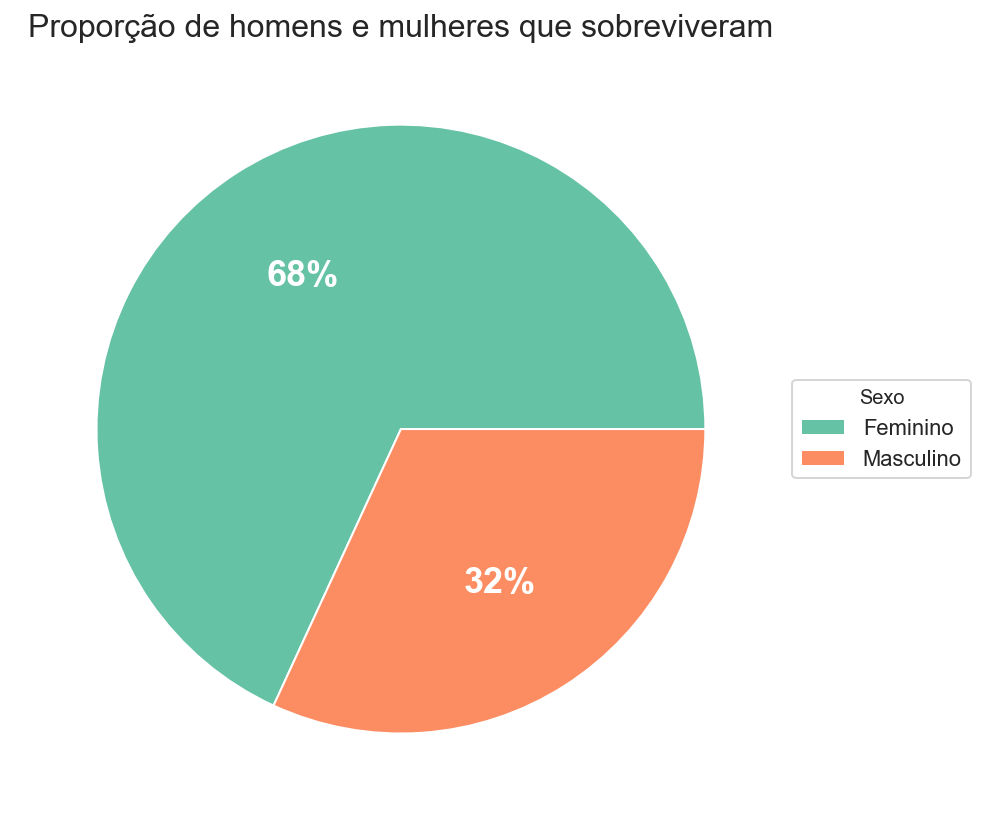

In [19]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

quantidade = df_sobreviventes['Sexo'].value_counts()
sexo = df_sobreviventes['Sexo'].unique()

fatias, text, autotexts = ax.pie(quantidade, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax.legend(fatias, sexo, title="Sexo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Proporção de homens e mulheres que sobreviveram", size=16)
plt.setp(autotexts, size=18, weight="bold")
plt.show()

Percebe-se que 68% dos sobreviventes foram do sexo feminino e 32% do sexo masculino.

#### 2. Qual foi o sexo predominante em cada uma das classes sócio-econômicas?

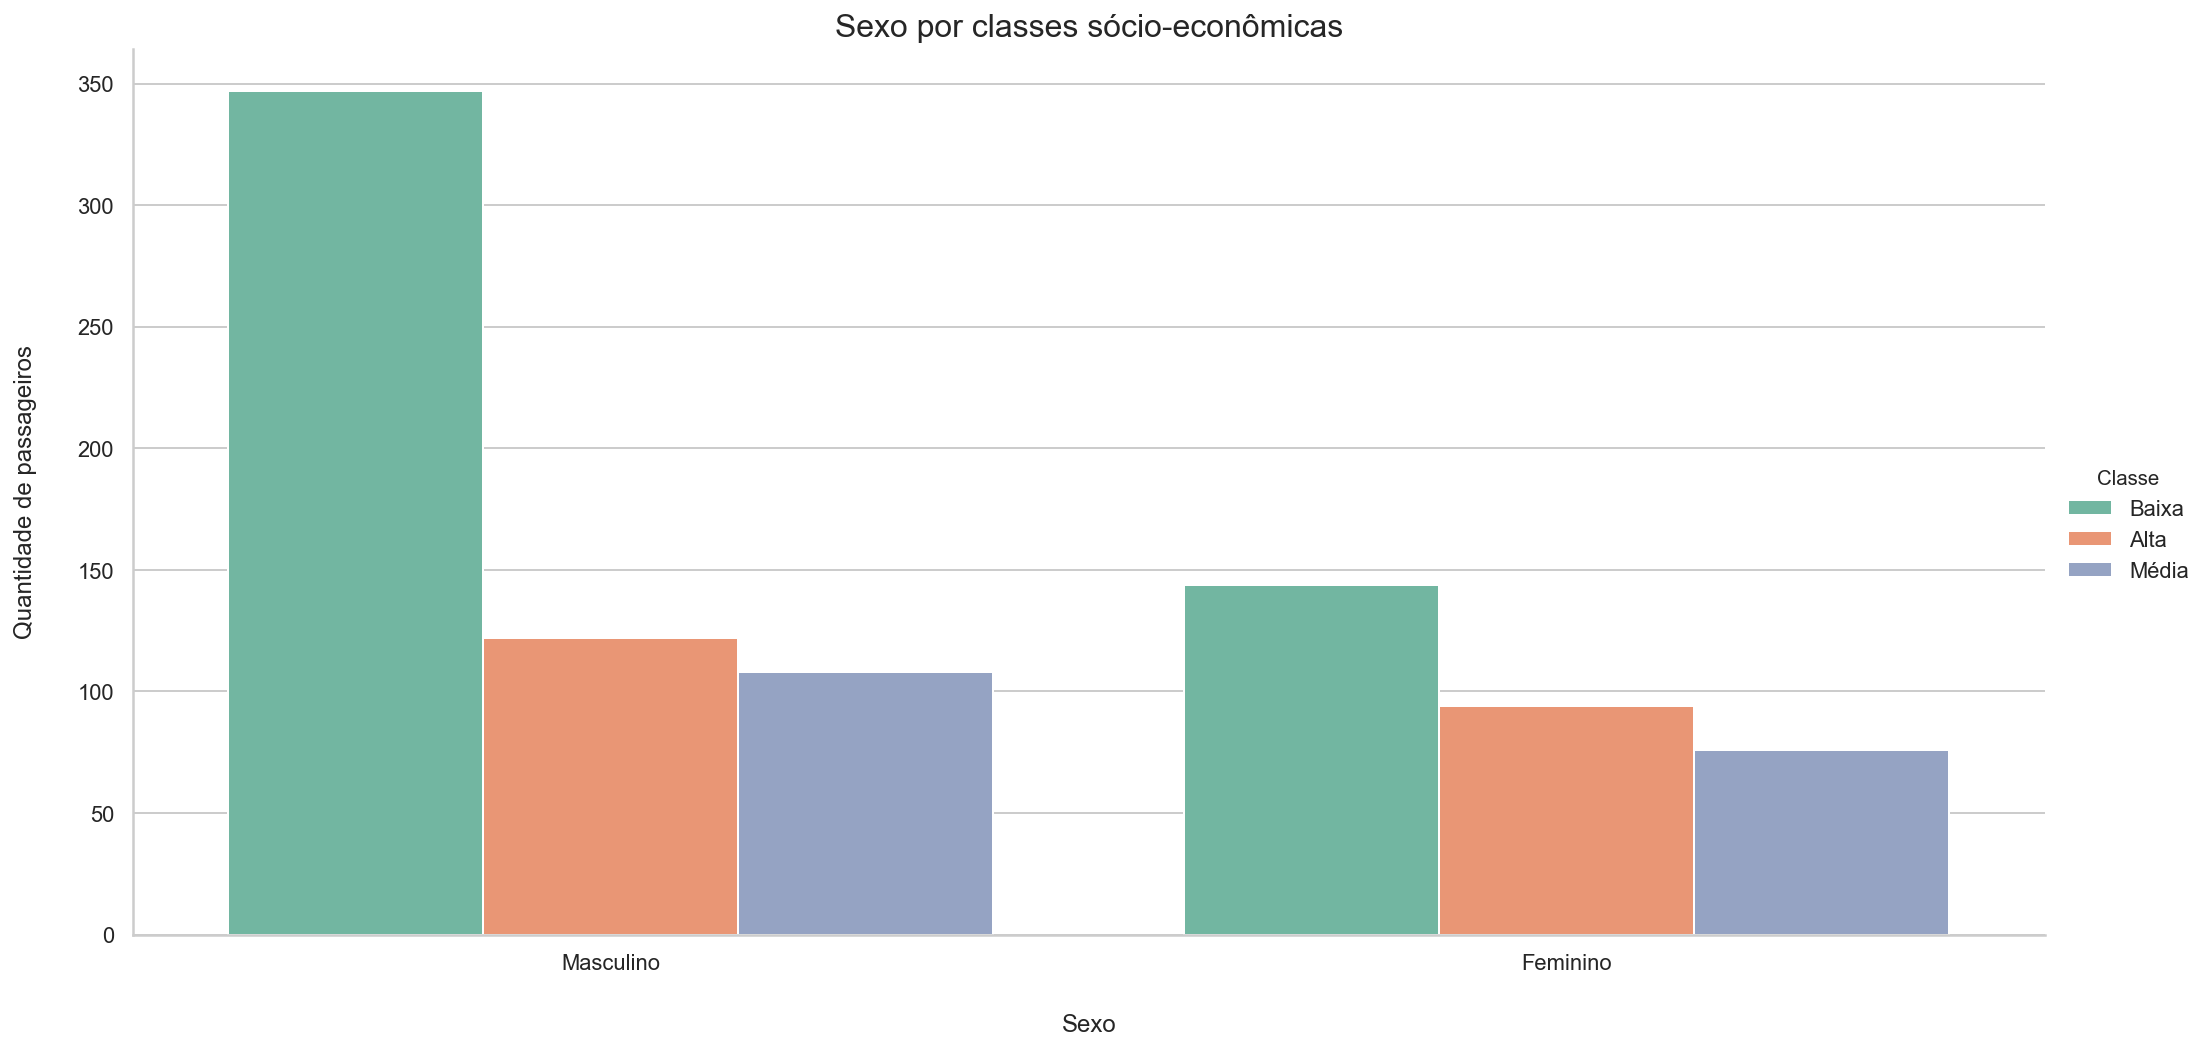

In [20]:
# Separação dos sexos por classes sócio-econômicas
fig = sns.catplot('Sexo', data=df_titanic, kind="count", hue='Classe', height=7, aspect=2)

plt.title("Sexo por classes sócio-econômicas", size=16)
plt.xlabel("Sexo", labelpad=20)
plt.ylabel("Quantidade de passageiros", labelpad=20)
plt.show(fig)

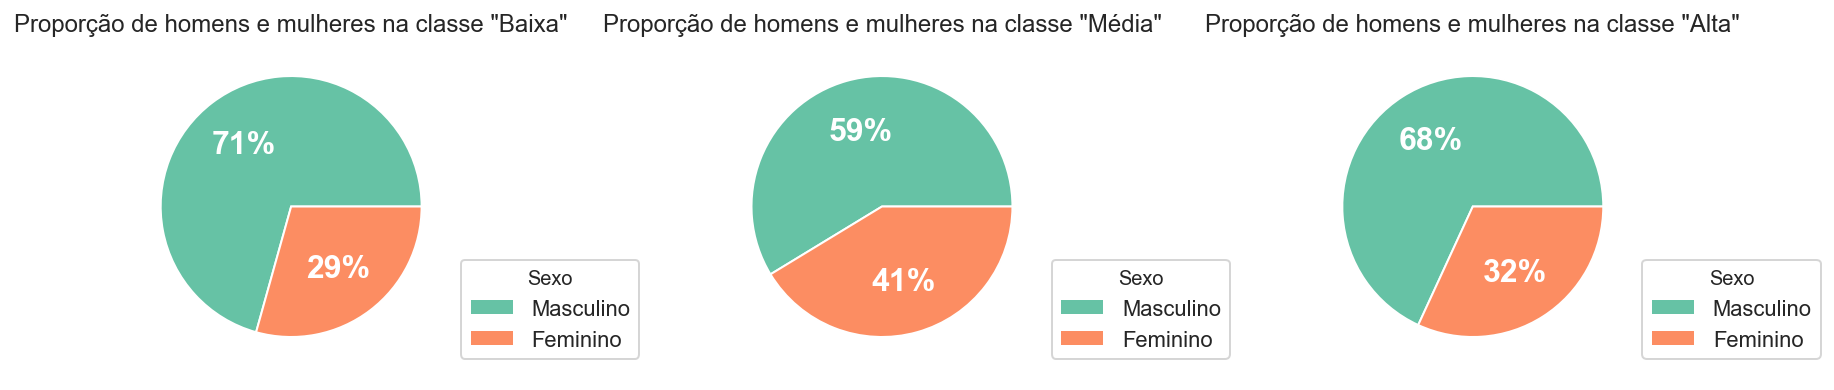

In [21]:
fig, ax= plt.subplots(1, 3, figsize=(15, 3), subplot_kw=dict(aspect="equal"))

# Classe Baixa
quantidade_baixa = df_titanic.query('Classe == "Baixa"')['Sexo'].value_counts()
sexo_baixa = quantidade_baixa.keys()
fatias, text, autotexts = ax[0].pie(quantidade_baixa, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[0].set_title('Proporção de homens e mulheres na classe "Baixa"', size=12)
ax[0].legend(fatias, sexo_baixa, title="Sexo", loc="lower right", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.setp(autotexts, size=16, weight="bold")

# Classe Média
quantidade_media = df_titanic.query('Classe == "Média"')['Sexo'].value_counts()
sexo_media = quantidade_media.keys()
fatias, text, autotexts = ax[1].pie(quantidade_media, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[1].set_title('Proporção de homens e mulheres na classe "Média"', size=12)
ax[1].legend(fatias, sexo_media, title="Sexo", loc="lower right", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.setp(autotexts, size=16, weight="bold")

# Classe Alta
quantidade_alta = df_titanic.query('Classe == "Alta"')['Sexo'].value_counts()
sexo_alta = quantidade_alta.keys()
fatias, text, autotexts = ax[2].pie(quantidade, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[2].legend(fatias, sexo_alta, title="Sexo", loc="lower right", bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[2].set_title('Proporção de homens e mulheres na classe "Alta"', size=12)
plt.setp(autotexts, size=16, weight="bold")

plt.show()

Em todas as classes sócio-econômicas o sexo "masculino" fora predominante.

#### 3. Qual era a faixa etária dos passageiros presentes no Titanic?

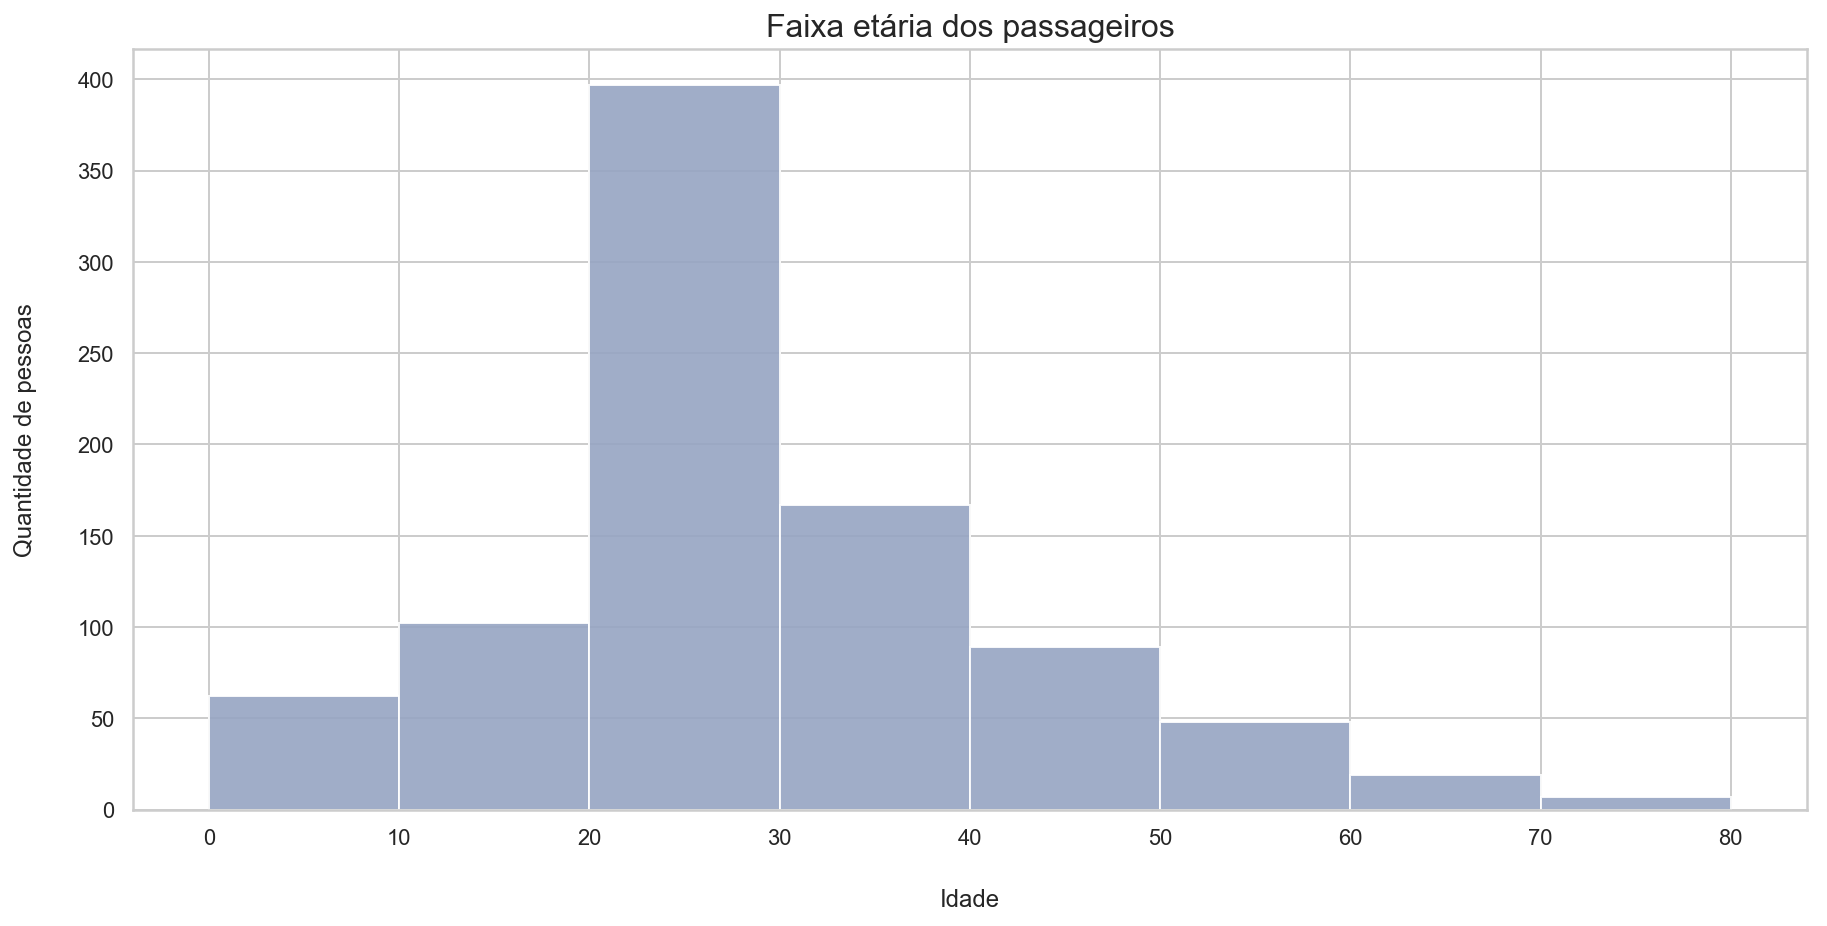

In [22]:
fig, ax = plt.subplots(figsize = (15,7))

ax.hist(df_titanic['Idade'], alpha=0.9, color='#96A4C2', label="Sobreviveram",
        bins=range(df_titanic['Idade'].min(),df_titanic['Idade'].max()+1,10))

ax.set_title('Faixa etária dos passageiros', size=16)
ax.set_xlabel('Idade', labelpad=20)
ax.set_ylabel('Quantidade de pessoas', labelpad=20)
plt.show()

As idades estiveram compreendidas entre crianças com meses de idade até idosos de 80 anos.

#### 4. Qual era a faixa etária predominante dos passageiros sobreviventes e falecidos?

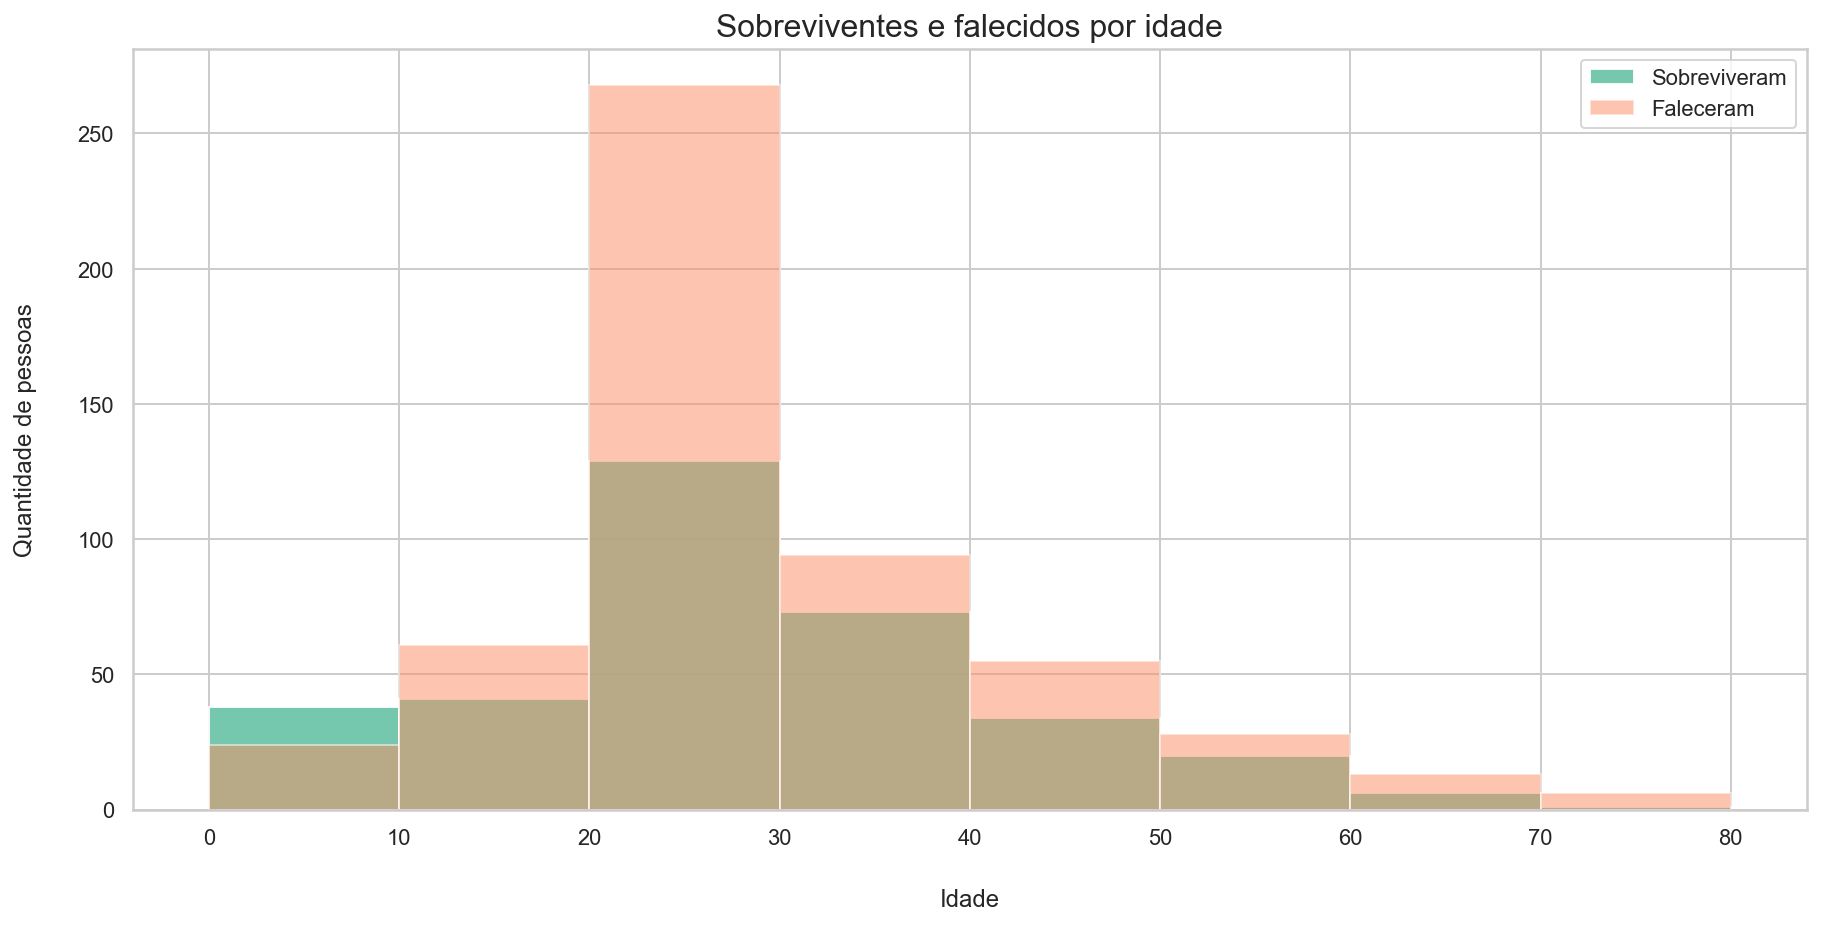

In [23]:
fig, ax = plt.subplots(figsize = (15,7))

ax.hist(df_sobreviventes['Idade'], alpha=0.9, label="Sobreviveram",
        bins=range(df_titanic['Idade'].min(),df_titanic['Idade'].max()+1,10))
ax.hist(df_falecidos['Idade'], alpha=0.5, label="Faleceram",
        bins=range(df_titanic['Idade'].min(),df_titanic['Idade'].max()+1,10))

ax.set_title('Sobreviventes e falecidos por idade', size=16)
ax.set_xlabel('Idade', labelpad=20)
ax.set_ylabel('Quantidade de pessoas', labelpad=20)
ax.legend(loc='upper right')
plt.show()

Com exceção das crianças de até 10 anos, todas as demais idades tiveram mais falecidos que sobreviventes. Destaque aos tripulantes de 20 a 30 anos e 60 a 80 anos, onde o número de falecidos foi de mais que 50% em comparação aos sobreviventes das respectivas faixas de idade.

#### 5. Baseado na faixa etária, mais crianças ou adultos sobreviveram?

Ao considerar "adultos" somente passageiros com mais de 18 anos, ao separar os grupos, pode-se obter os seguintes resultados:

In [24]:
# Divisão dos dados em grupos de crianças e adultos
df_titanic['Crianca_Adulto'] = 0
df_titanic.loc[df_titanic[df_titanic['Idade'] < 18].index, 'Crianca_Adulto'] = 'Criança'
df_titanic.loc[df_titanic[df_titanic['Idade'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'

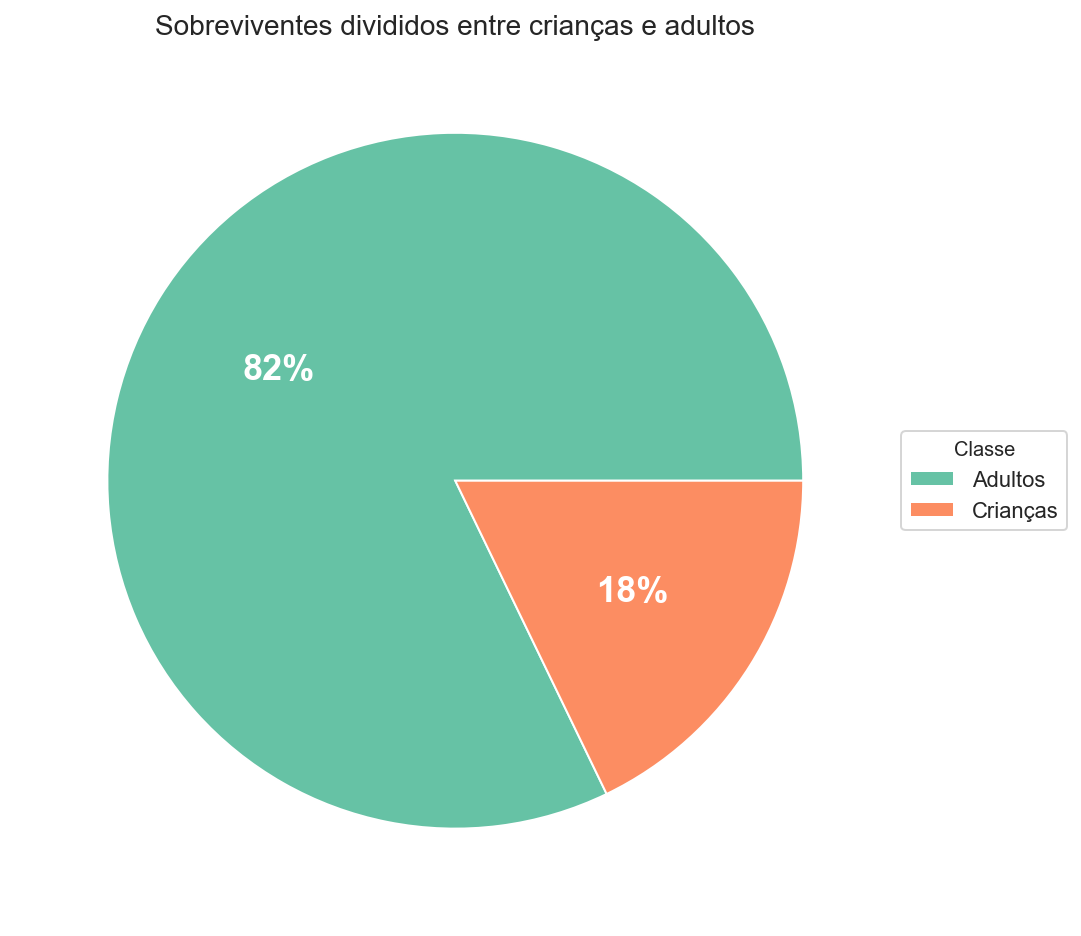

In [25]:
fig, grafico = plt.subplots(figsize=(13, 8), subplot_kw=dict(aspect="equal"))

sobreviventes = df_titanic.query('Sobreviveu == "Sim"').groupby('Crianca_Adulto')['Sobreviveu'].value_counts()
labels = ['Adultos', 'Crianças']

fatias, text, autotexts = grafico.pie(sobreviventes, 
                                      labels=labels, 
                                      autopct=lambda pct: "{:.0f}%".format(pct), 
                                      textprops=dict(color="w"))

grafico.legend(fatias, labels, title="Classe", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
grafico.set_title('Sobreviventes divididos entre crianças e adultos', size=14)

plt.setp(autotexts, size=18, weight="bold")
plt.show()

Entre os 342 sobreviventes, 82% foram adultos e 17% crianças, partindo do pressuposto que adultos são apenas os tripulantes com 18 anos ou mais.

#### 6. A classe sócio-econômica fora um fator determinante na taxa de sobrevivência?

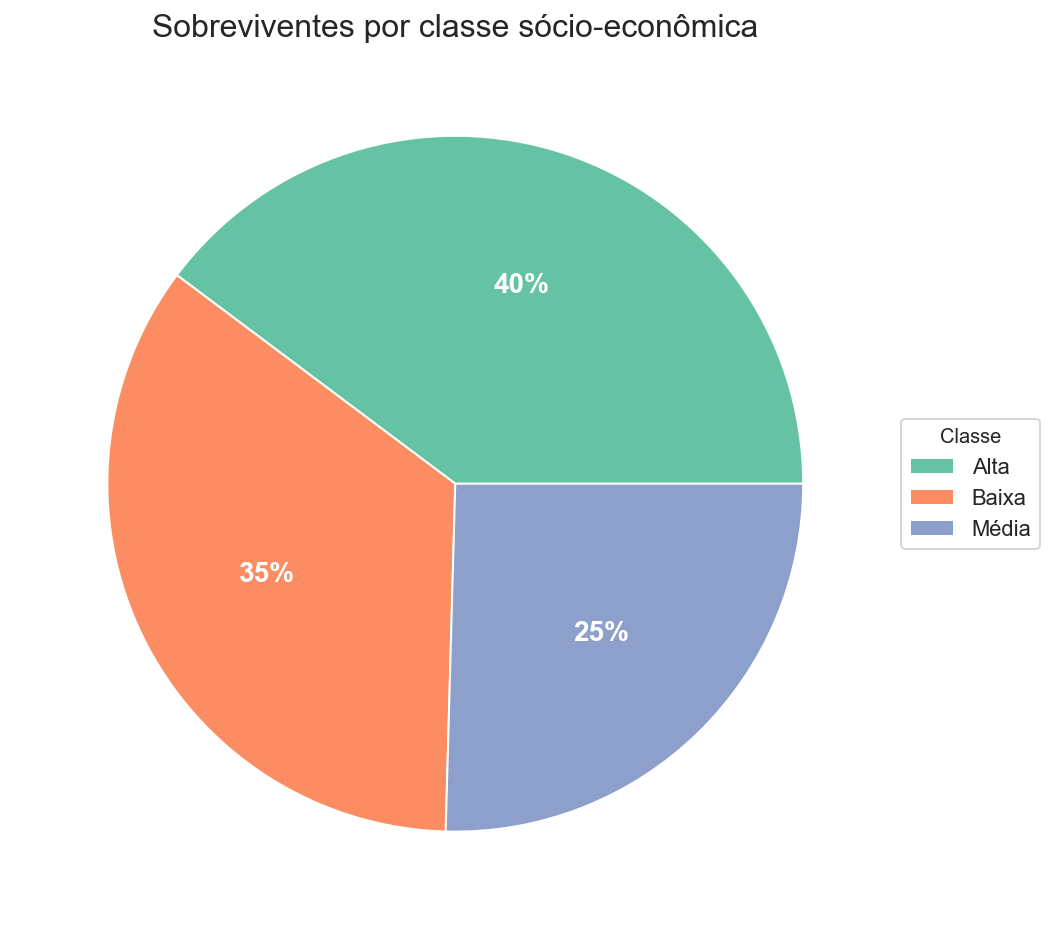

In [26]:
fig, ax = plt.subplots(figsize=(13, 8), subplot_kw=dict(aspect="equal"))

quantidade = df_titanic.query('Sobreviveu == "Sim"')['Classe'].value_counts()
classe = df_titanic.query('Sobreviveu == "Sim"')['Classe'].unique()

fatias, text, autotexts = ax.pie(quantidade, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax.legend(fatias, classe, title="Classe", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=14, weight="bold")
ax.set_title('Sobreviventes por classe sócio-econômica', size=16)
plt.show()

Sim, entre os sobreviventes, o número de tripulantes da classe "alta" foram maiores que as demais, logo entende-se que estes possuíram preferências ao uso dos botes salva-vidas.

#### 7. Entre os passageiros e tripulantes falecidos, qual foi a classe sócio-econômica predominante?

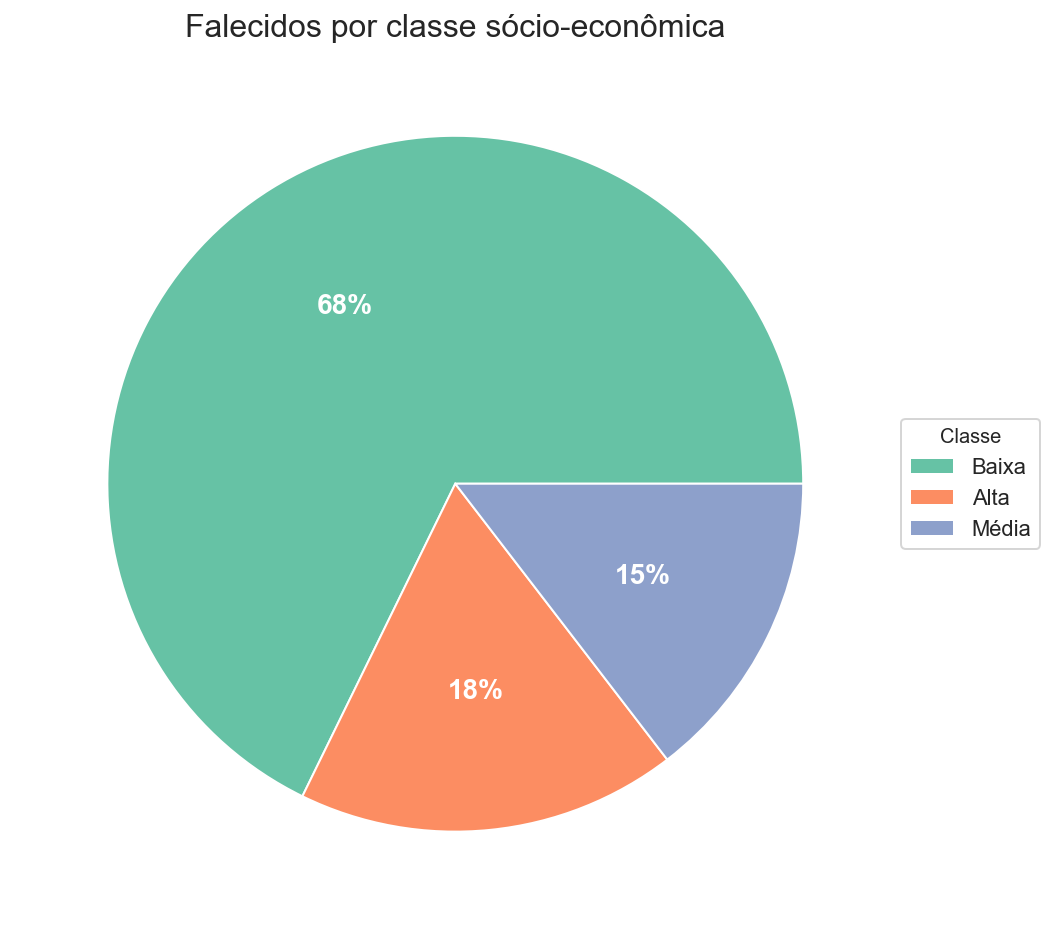

In [27]:
fig, ax = plt.subplots(figsize=(13, 8), subplot_kw=dict(aspect="equal"))

quantidade = df_titanic.query('Sobreviveu == "Não"')['Classe'].value_counts()
classe = df_titanic.query('Sobreviveu == "Não"')['Classe'].unique()

fatias, text, autotexts = ax.pie(quantidade, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax.legend(fatias, classe, title="Classe", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Falecidos por classe sócio-econômica', size=16)
plt.setp(autotexts, size=14, weight="bold")
plt.show()

Entre os falecidos, a classe "baixa" correspondia a cerca de 68% dos tripulantes.

#### 8. Qual foi o sexo predominante em cada uma das classes sócio-econômicas dos sobreviventes? 

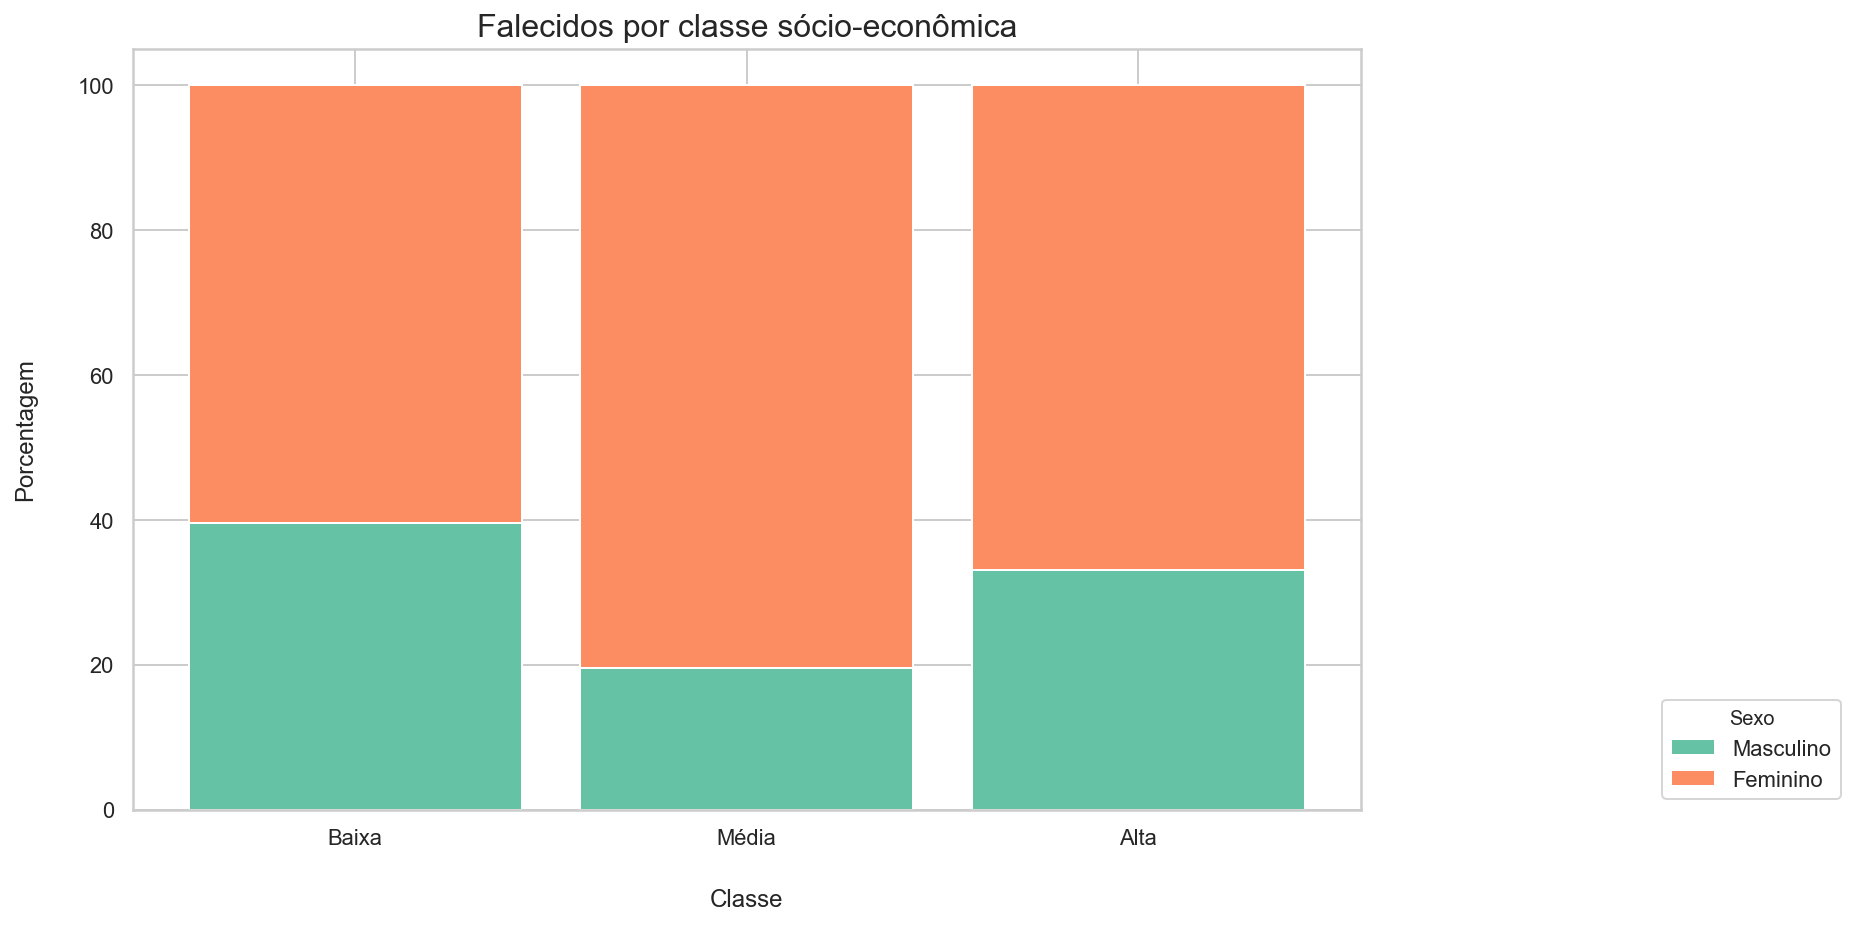

In [42]:
plt.rcParams['figure.figsize'] = (11,7)
r = [0,1,2]
dados = {'Masculino': [df_sobreviventes.query('Classe == "Baixa"')['Sexo'].value_counts()['Masculino'],
                          df_sobreviventes.query('Classe == "Média"')['Sexo'].value_counts()['Masculino'],
                          df_sobreviventes.query('Classe == "Alta"')['Sexo'].value_counts()['Masculino']], 
            'Feminino': [df_sobreviventes.query('Classe == "Baixa"')['Sexo'].value_counts()['Feminino'],
                         df_sobreviventes.query('Classe == "Média"')['Sexo'].value_counts()['Feminino'],
                         df_sobreviventes.query('Classe == "Alta"')['Sexo'].value_counts()['Feminino']]}
df = pd.DataFrame(dados)
 
total = [i+j for i,j in zip(df['Masculino'], df['Feminino'])]
masculino = [i / j * 100 for i,j in zip(df['Masculino'], total)]
feminino = [i / j * 100 for i,j in zip(df['Feminino'], total)]
 
barWidth = 0.85
classes = ('Baixa','Média','Alta')

plt.bar(r, masculino, edgecolor='white', width=barWidth)
plt.bar(r, feminino, bottom=masculino, width=barWidth)

plt.xticks(r, classes)
plt.xlabel("Classe", labelpad=20)
plt.ylabel("Porcentagem", labelpad=20)
plt.title('Falecidos por classe sócio-econômica', size=16)
plt.legend(fatias, dados.keys(), title="Sexo", loc="lower right", bbox_to_anchor=(1, 0, 0.4, 1))

plt.show()


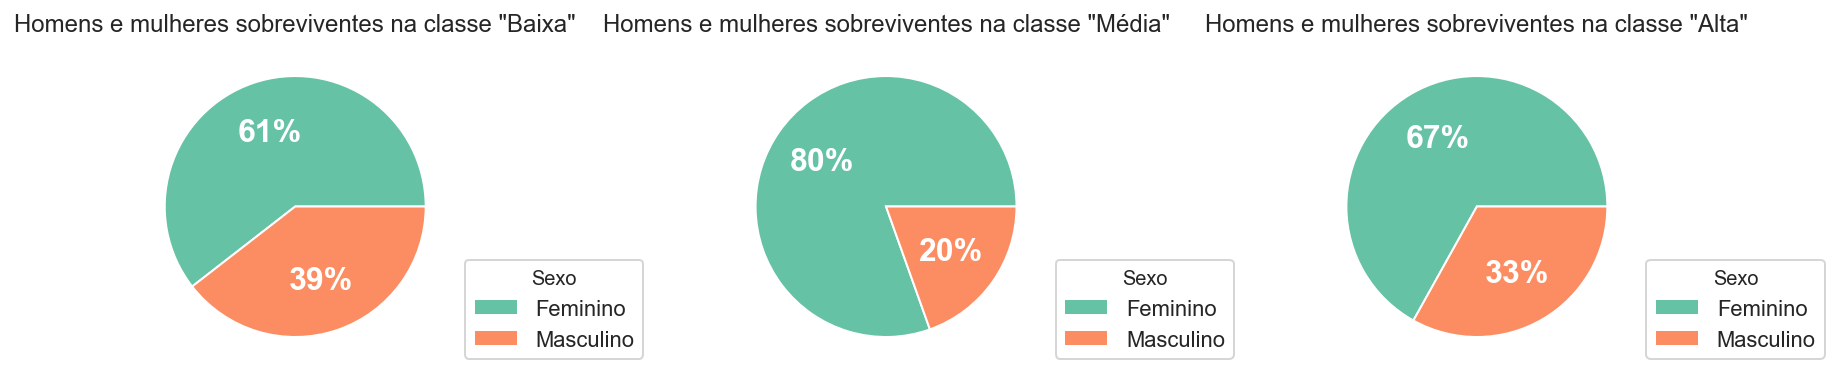

In [29]:
fig, ax= plt.subplots(1, 3, figsize=(15, 3), subplot_kw=dict(aspect="equal"))
pos_legenda = (1.1, 0, 0.5, 1)
# Classe Baixa
quantidade_baixa = df_sobreviventes.query('Classe == "Baixa"')['Sexo'].value_counts()
sexo_baixa = quantidade_baixa.keys()
fatias, text, autotexts = ax[0].pie(quantidade_baixa, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[0].set_title('Homens e mulheres sobreviventes na classe "Baixa"', size=12)
ax[0].legend(fatias, sexo_baixa, title="Sexo", loc="lower right", bbox_to_anchor=pos_legenda)
plt.setp(autotexts, size=16, weight="bold")

# Classe Média
quantidade_media = df_sobreviventes.query('Classe == "Média"')['Sexo'].value_counts()
sexo_media = quantidade_media.keys()
fatias, text, autotexts = ax[1].pie(quantidade_media, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[1].set_title('Homens e mulheres sobreviventes na classe "Média"', size=12)
ax[1].legend(fatias, sexo_media, title="Sexo", loc="lower right", bbox_to_anchor=pos_legenda)
plt.setp(autotexts, size=16, weight="bold")

# Classe Alta
quantidade_alta = df_sobreviventes.query('Classe == "Alta"')['Sexo'].value_counts()
sexo_alta = quantidade_alta.keys()
fatias, text, autotexts = ax[2].pie(quantidade_alta, autopct=lambda pct: "{:.0f}%".format(pct), textprops=dict(color="w"))
ax[2].legend(fatias, sexo_alta, title="Sexo", loc="lower right", bbox_to_anchor=pos_legenda)
ax[2].set_title('Homens e mulheres sobreviventes na classe "Alta"', size=12)
plt.setp(autotexts, size=16, weight="bold")

plt.show()

Em todas as classes sócio-econômicas, o sexo feminino esteve mais presente entre os sobreviventes.

#### Distribuição das idades por sexo

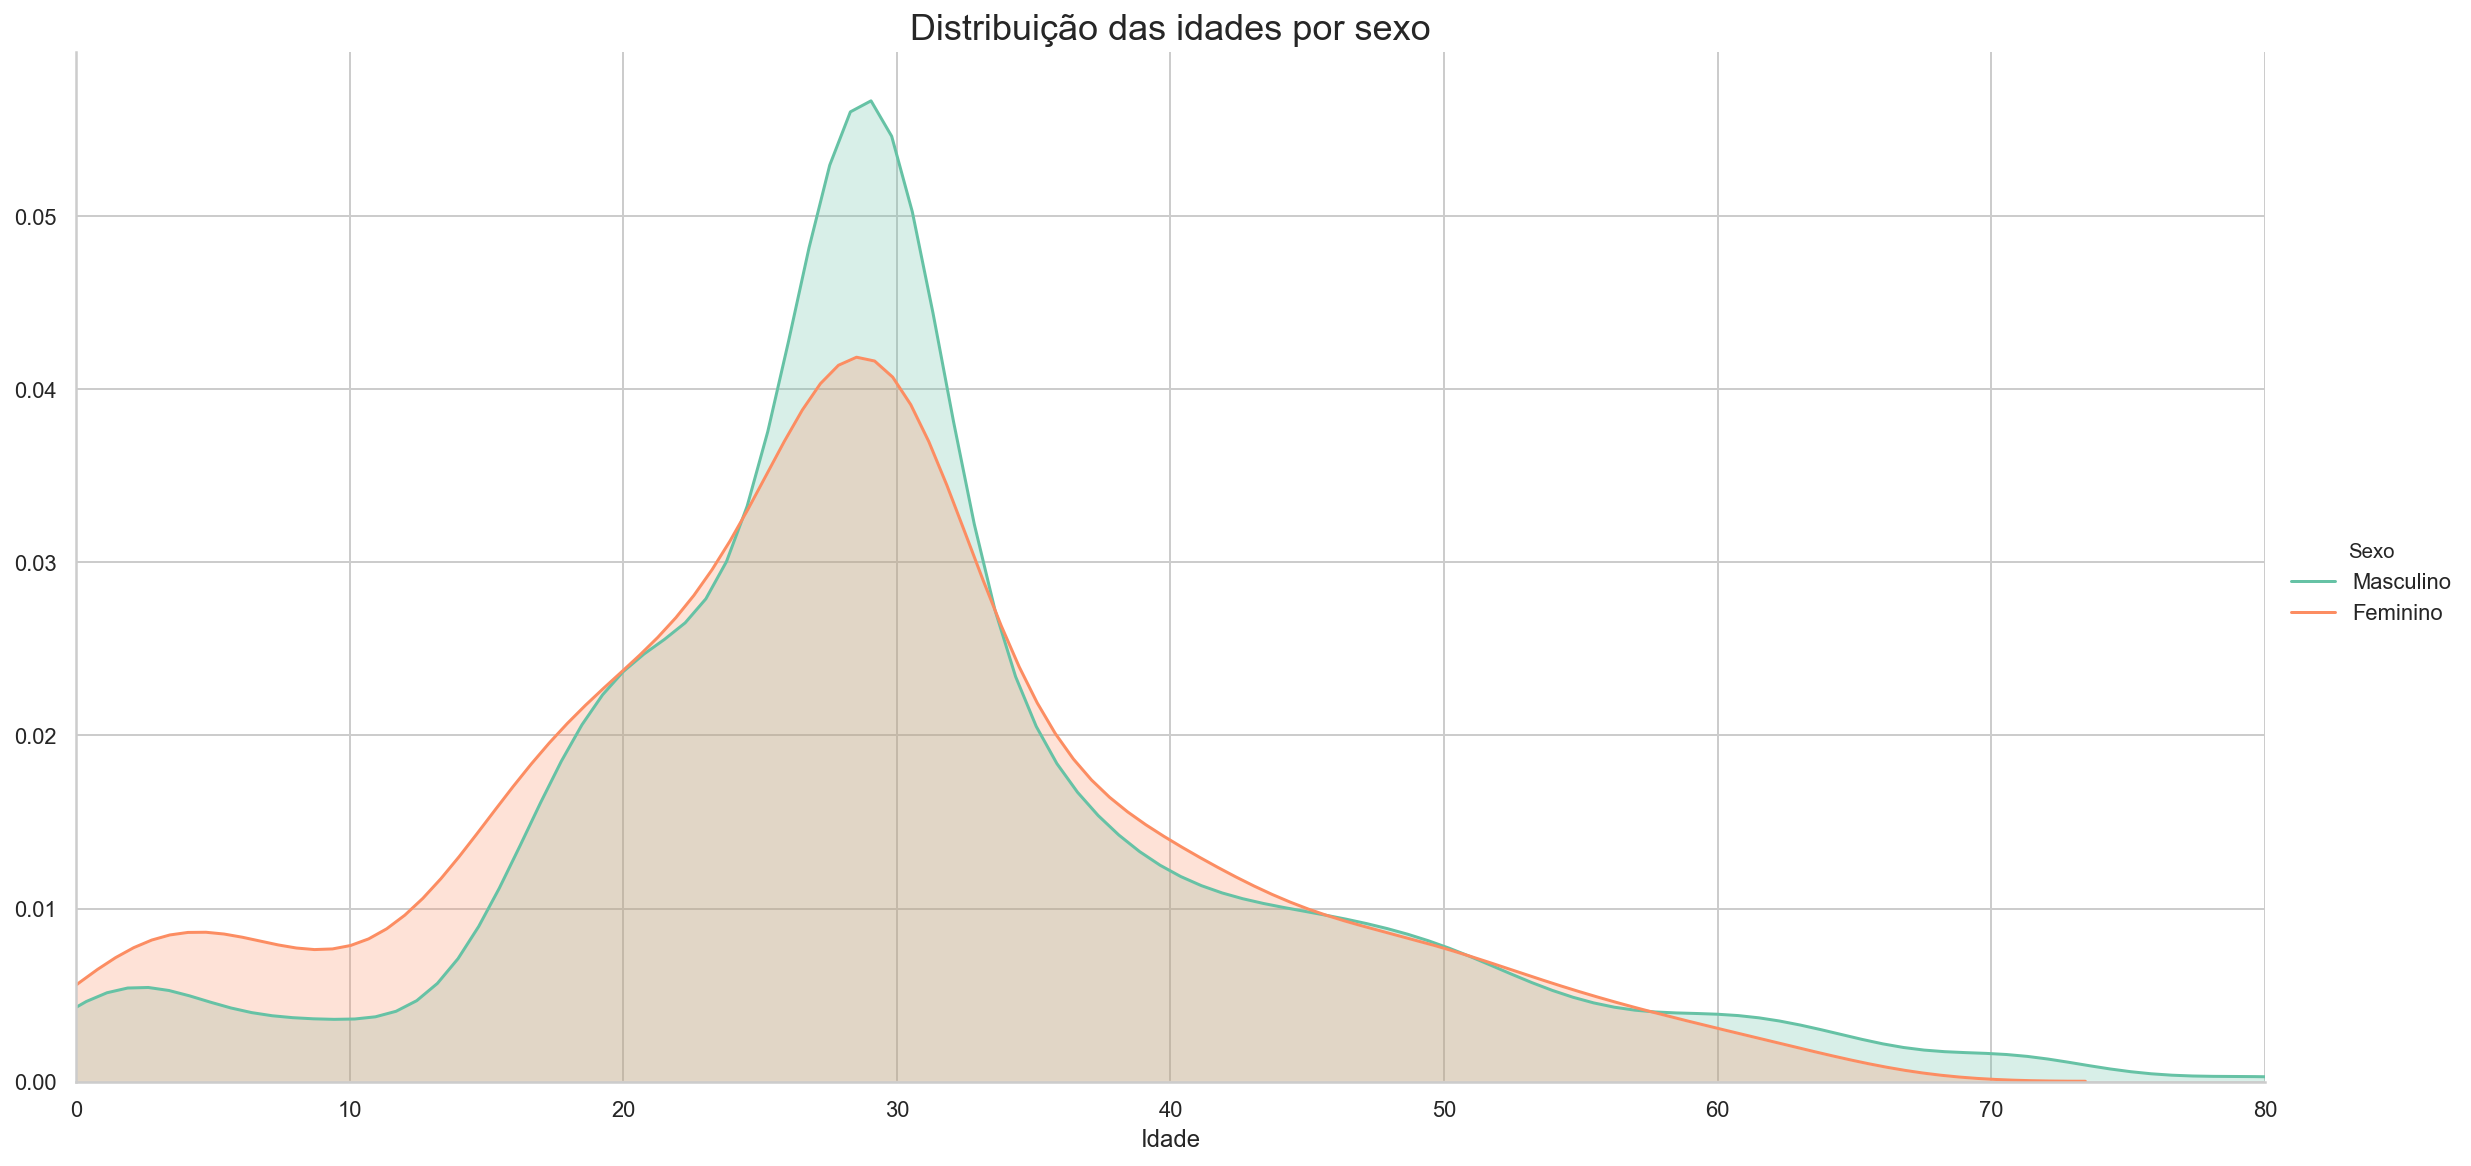

In [52]:
fig = sns.FacetGrid(df_titanic, hue="Sexo", height=8, aspect=2);
fig.map(sns.kdeplot,'Idade',shade= True)
maior_idade = df_titanic['Idade'].max()
fig.set(xlim=(0,maior_idade))
fig.add_legend()
plt.title('Distribuição das idades por sexo', size="18");

#### Distribuição das idades por classes sócio-econômicas

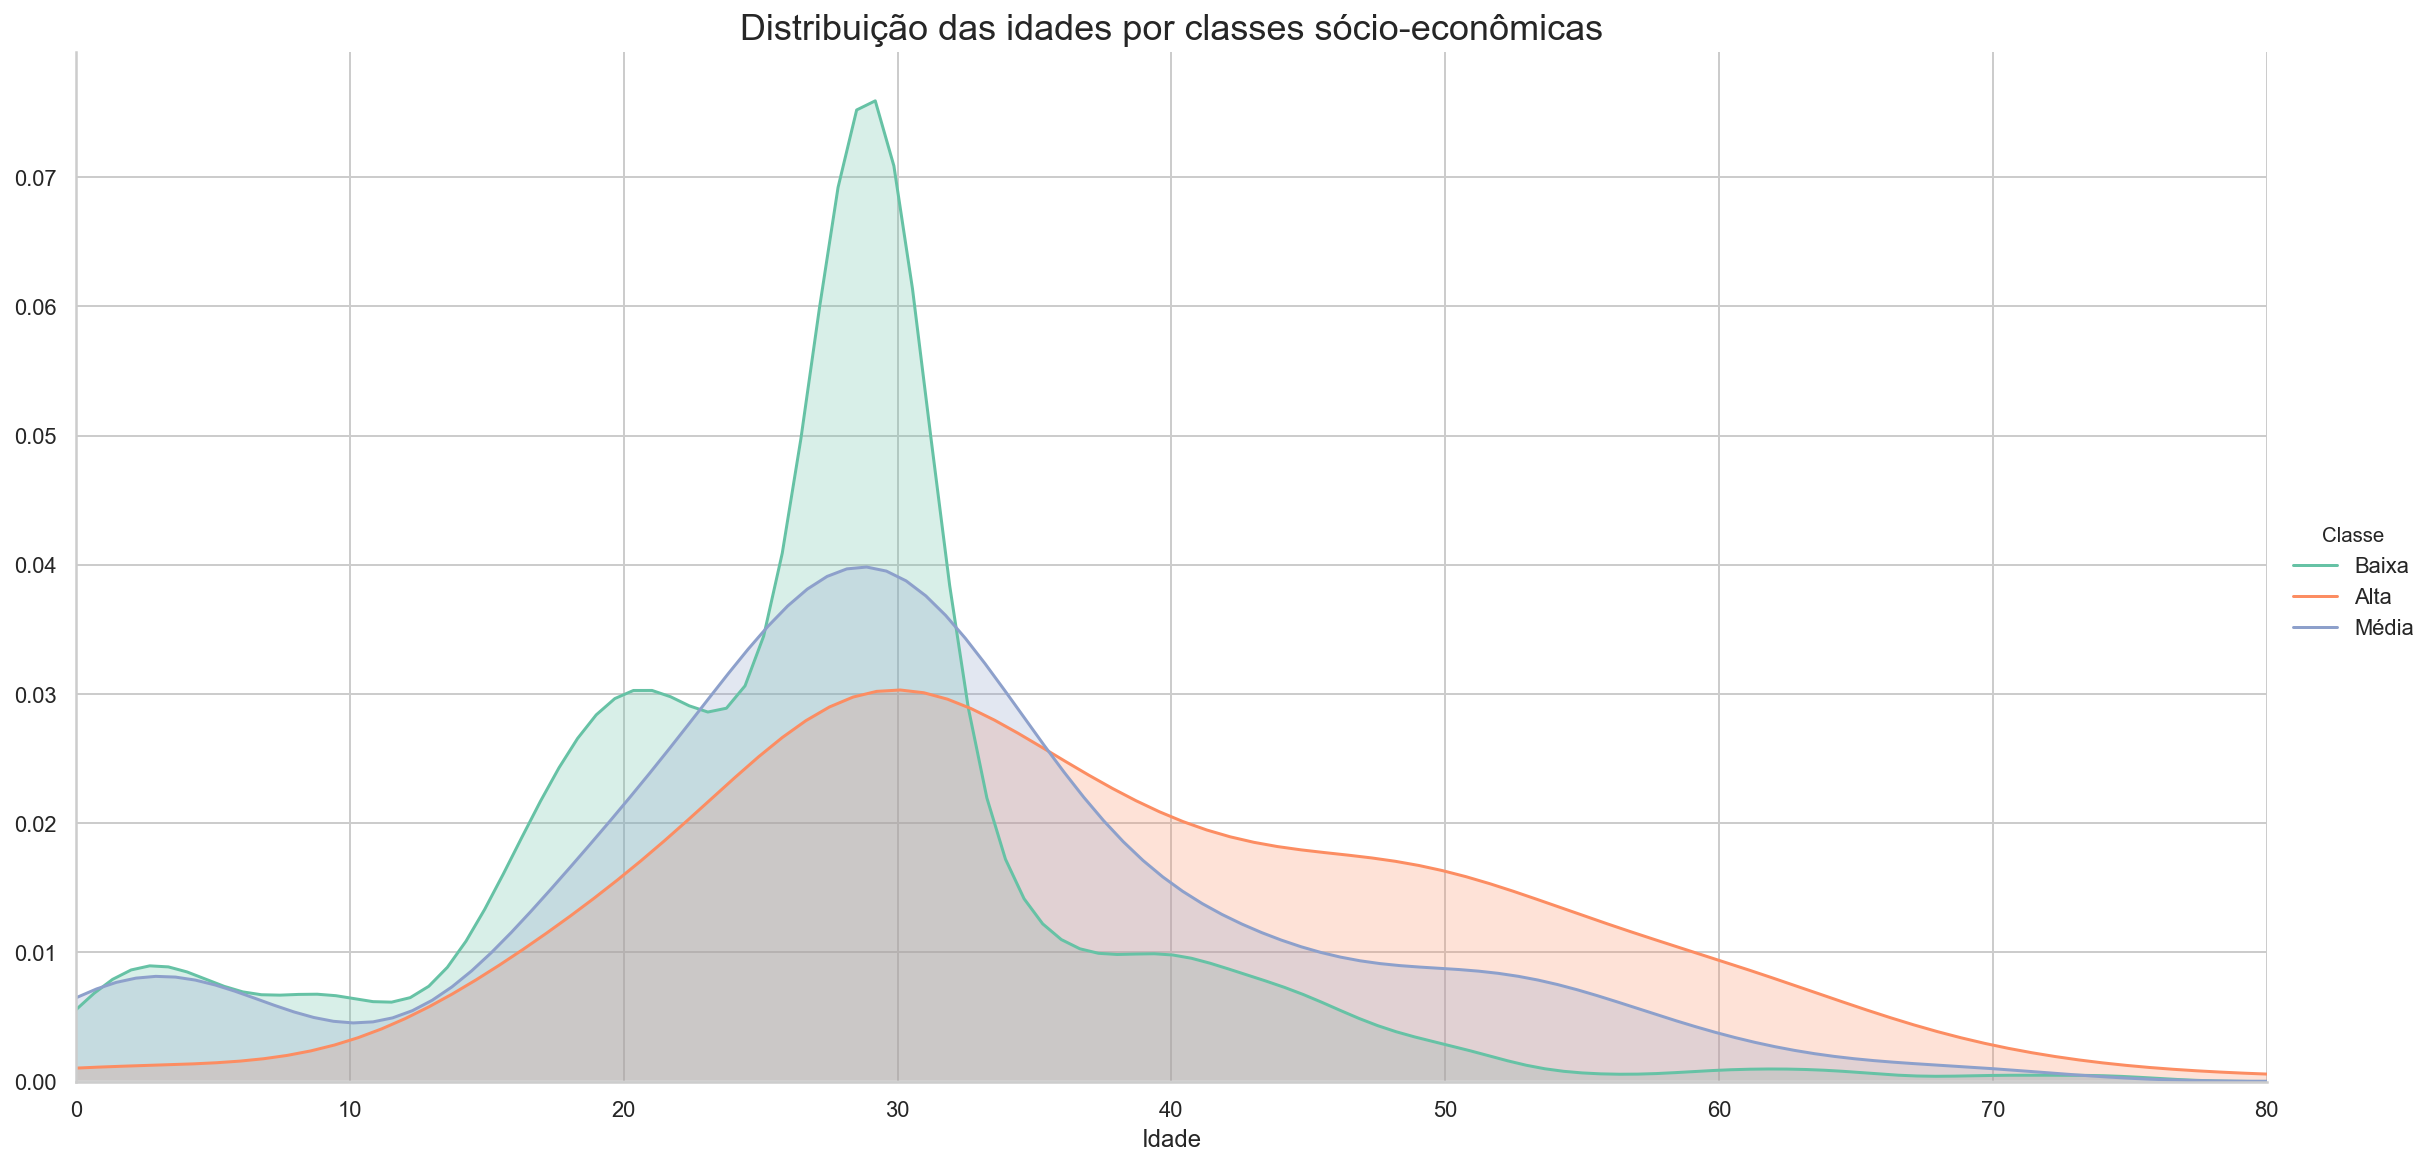

In [53]:
fig = sns.FacetGrid(df_titanic, hue='Classe', height=8, aspect=2);
fig.map(sns.kdeplot, 'Idade',shade=True)
oldest = df_titanic['Idade'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()
plt.title('Distribuição das idades por classes sócio-econômicas', size="18");

#### Distribuição das idades por sexo, classes sócio-econômicas e local de embarque

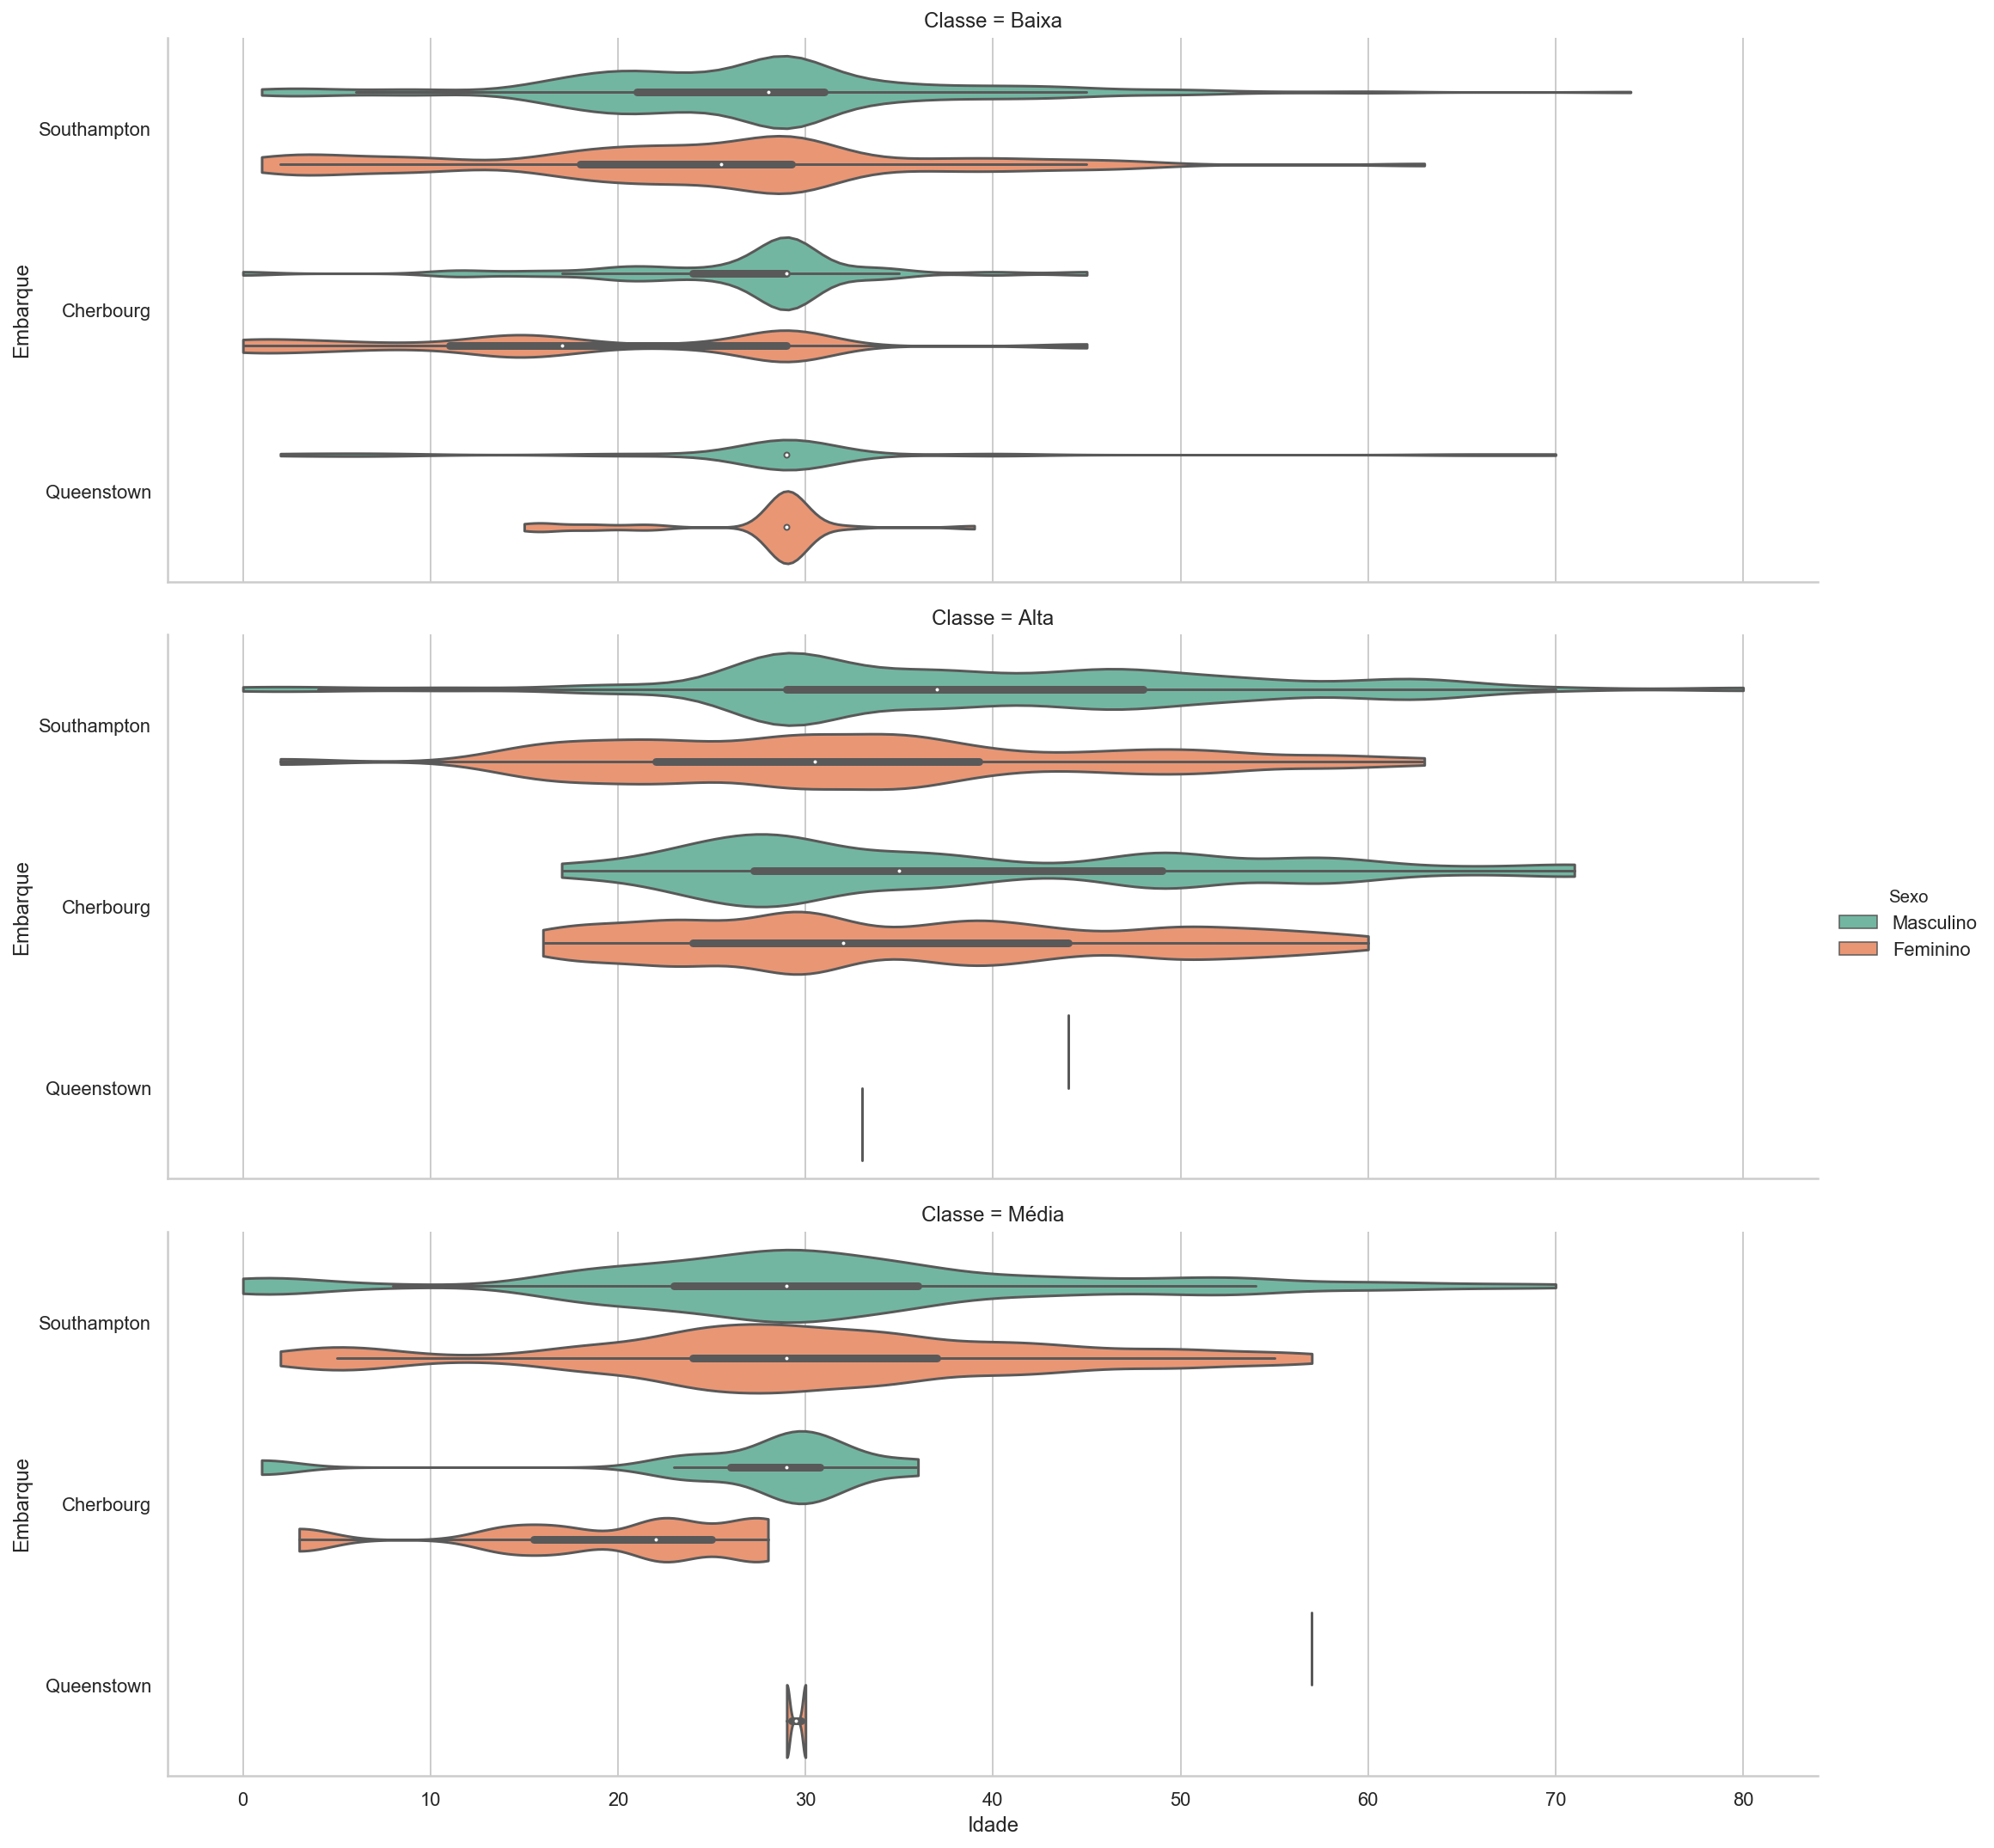

In [62]:
sns.catplot(x="Idade", y="Embarque", hue="Sexo", row="Classe",
            data=df_titanic[df_titanic.Embarque.notnull()],
            orient="h", height=5, aspect=3,
            kind="violin", dodge=True, cut=0, bw=.2);


# 4. Conclusão

Ao analisar os dados, os resultados indicam que a classe e o sexo dos tripulantes, ou seja, ser mulher e com posição socioeconômica superior, dariam maiores chances de sobrevivência ao desastre. Levando em conta o fator "idade", somente aos tripulantes abaixo de 10 anos mostrou ser importante, visto que mulheres e crianças, em todas as classes, tiveram taxas maiores de sobrevivência, mas de forma alguma crianças ou mulheres garantiram 100% de sobrevivência.


#### Limitações

Os dados referentes às idades estavam incompletos, abrangendo aproximadamente 20% dos valores etários. Portanto, ao imputar o valor médio a estes, alguns resultados estatísticos descritivos podem apresentar inconsistências. Além disso, como não temos uma clara demarcação de idade para separar crianças de adultos, assumimos o valor de corte para a idade de crianças em 18 anos. Isso pode implicar em alguns resultados.  